# Stock Price Prediction

In [16]:
# import libraries
import pandas as pd
import numpy as np
from sklearn import metrics
%matplotlib inline
import matplotlib.pyplot as plt

In [7]:
# add dataset
df = pd.read_csv('Oracle Dataset.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-12,0.063272,0.064043,0.063272,0.063272,0.051487,393012000
1,1986-03-13,0.064815,0.065586,0.064815,0.064815,0.052742,125290800
2,1986-03-14,0.067130,0.067901,0.067130,0.067130,0.054626,57866400
3,1986-03-17,0.066358,0.066358,0.065586,0.065586,0.053370,28285200
4,1986-03-18,0.064815,0.064815,0.064043,0.064043,0.052114,32335200


In [10]:
series_shifted = df['Close'].shift()
df['prev_close'] = series_shifted
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,prev_close
0,1986-03-12,0.063272,0.064043,0.063272,0.063272,0.051487,393012000,NaN
1,1986-03-13,0.064815,0.065586,0.064815,0.064815,0.052742,125290800,0.063272
2,1986-03-14,0.067130,0.067901,0.067130,0.067130,0.054626,57866400,0.064815
3,1986-03-17,0.066358,0.066358,0.065586,0.065586,0.053370,28285200,0.067130
4,1986-03-18,0.064815,0.064815,0.064043,0.064043,0.052114,32335200,0.065586


In [19]:
# time format
# df['minute'] = pd.to_datetime(df.minute)
# df.head()

KeyError: 'date'

In [21]:
df.shape

(9647, 8)

In [20]:
# to remove null
df.isnull().sum()

Date          0
Open          0
High          0
Low           0
Close         0
Adj Close     0
Volume        0
prev_close    1
dtype: int64

In [22]:
df.dropna(inplace = True)
df

,Date,Open,High,Low,Close,Adj Close,Volume,prev_close
1,1986-03-13,0.064815,0.065586,0.064815,0.064815,0.052742,125290800,0.063272
2,1986-03-14,0.067130,0.067901,0.067130,0.067130,0.054626,57866400,0.064815
3,1986-03-17,0.066358,0.066358,0.065586,0.065586,0.053370,28285200,0.067130
4,1986-03-18,0.064815,0.064815,0.064043,0.064043,0.052114,32335200,0.065586
5,1986-03-19,0.064043,0.064043,0.062500,0.062500,0.050859,22712400,0.064043
...,...,...,...,...,...,...,...,...
9642,2024-06-14,139.259995,139.970001,137.380005,138.130005,138.130005,11330800,139.850006
9643,2024-06-17,138.800003,141.440002,138.250000,141.309998,141.309998,11232800,138.130005
9644,2024-06-18,141.220001,145.059998,141.220001,144.639999,144.639999,11629400,141.309998
9645,2024-06-20,145.320007,145.320007,141.949997,142.910004,142.910004,8940000,144.639999


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9646 entries, 1 to 9646
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        9646 non-null   object 
 1   Open        9646 non-null   float64
 2   High        9646 non-null   float64
 3   Low         9646 non-null   float64
 4   Close       9646 non-null   float64
 5   Adj Close   9646 non-null   float64
 6   Volume      9646 non-null   int64  
 7   prev_close  9646 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 678.2+ KB


In [26]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume,prev_close
count,9646.000000,9646.000000,9646.000000,9646.000000,9646.000000,9.646000e+03,9646.000000
mean,25.278723,25.584333,24.989367,25.288153,22.726612,3.558896e+07,25.273491
std,27.240620,27.511708,26.993357,27.256638,26.436848,3.272784e+07,27.232147
min,0.041667,0.043981,0.040123,0.041667,0.033906,3.888000e+05,0.041667
25%,3.069444,3.129630,2.974537,3.070601,2.498665,1.551472e+07,3.059028
50%,16.525000,16.945001,16.150000,16.530001,13.451090,2.983748e+07,16.520001
75%,39.311875,39.740002,38.967500,39.290001,34.003039,4.553076e+07,39.287500
max,145.320007,145.320007,141.949997,144.639999,144.639999,1.030963e+09,144.639999


<Axes: >

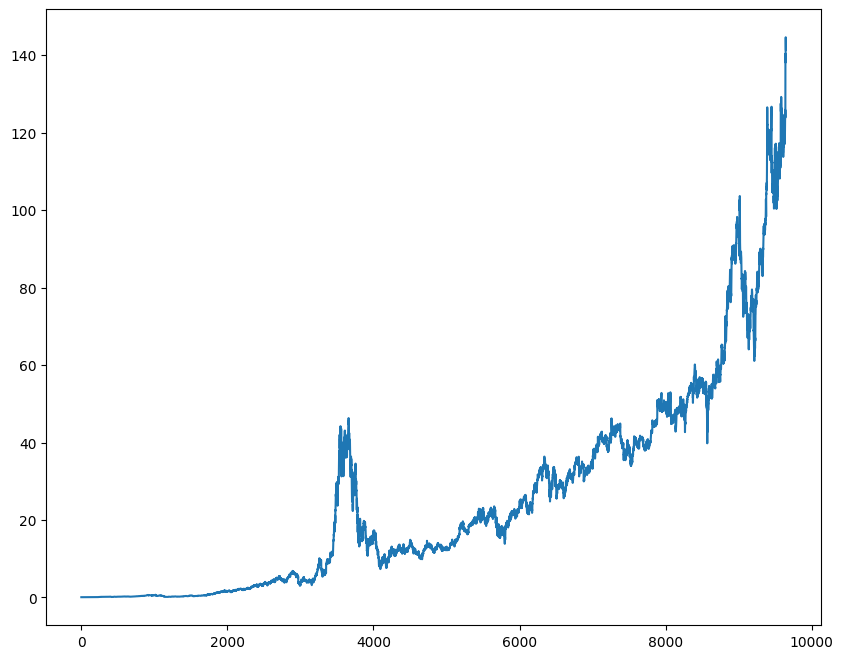

In [29]:
# plt close prices
df['Close'] .plot(figsize = (10,8))

In [56]:
# x and y
x = df[['Open','prev_close','High','Low']]
y = df['Close']

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0)

In [59]:
print(x_train.shape, x_test.shape)

(7234, 4) (2412, 4)


In [60]:
# Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
regressor = LinearRegression()
regressor.fit (x_train, y_train)

LinearRegression()

In [61]:
# print regressor
print(regressor.coef_)
print(regressor.intercept_)

[-0.60051687 -0.05120146  0.839012    0.8122656 ]
-0.001697827453607914


In [62]:
# predicted value
predicted = regressor.predict(x_test)
print(x_test)

            Open  prev_close        High         Low
8133   45.869999   45.900002   46.490002   45.189999
6089   25.580000   26.010000   25.670000   24.709999
9486  102.010002  101.650002  103.519997  101.099998
4944   11.990000   12.000000   12.220000   11.970000
5476   20.379999   20.309999   20.500000   19.690001
...          ...         ...         ...         ...
3698   34.750000   34.375000   35.875000   30.937500
3520   30.437500   29.843750   31.125000   29.312500
4238   10.900000   11.060000   11.150000   10.850000
8019   47.570000   47.279999   47.799999   46.169998
1743    0.805556    0.802469    0.839506    0.783951

[2412 rows x 4 columns]


In [63]:
predicted.shape

(2412,)

In [64]:
_df = pd.DataFrame({'Actual':y_test, 'Prediction':predicted})
print(_df)

          Actual  Prediction
8133   46.279999   45.814398
6089   24.969999   24.913851
9486  103.400002  102.509517
4944   12.080000   12.159233
5476   19.700001   19.913124
...          ...         ...
3698   34.062500   32.599313
3520   31.093750   30.115810
4238   10.990000   11.054446
8019   46.630001   46.617983
1743    0.833333    0.814597

[2412 rows x 2 columns]


In [65]:
import math
print('Mean Absolute Error=',metrics.mean_absolute_error(y_test, predicted))
print('Mean Square Error=',metrics.mean_squared_error(y_test, predicted))
print('Root Mean Error=',math.sqrt(metrics.mean_squared_error(y_test, predicted)))

Mean Absolute Error= 0.1294946336498146
Mean Square Error= 0.06753815294807881
Root Mean Error= 0.25988103614553876


In [68]:
predicted = regressor.predict(x)
print(predicted)

[6.38144886e-02 6.61679958e-02 6.39643298e-02 ... 1.44373259e+02
 1.42551736e+02 1.41032204e+02]


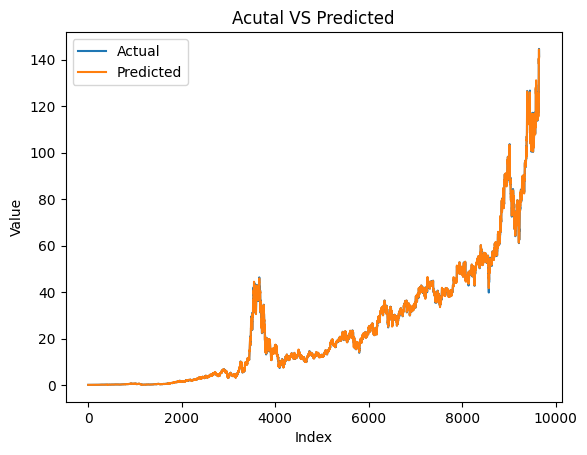

In [69]:
# plot the graph
plt.plot(y, label="Actual")
plt.plot(predicted, label="Predicted")
plt.xlabel("Index")
plt.ylabel("Value")
plt.title("Acutal VS Predicted")
plt.legend()
plt.show()